<a href="https://colab.research.google.com/github/abdinegara783/FindIT2023/blob/Experiment/Find_Outliers_Each_Row.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang dibutuhkan
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Set path to dataset
path = '/content/drive/My Drive/FindIT/no_miss_value.csv'

# Load dataset
df = pd.read_csv(path)

# Cari outlier untuk setiap atribut numerik
numerical_cols = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 
                  'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
                  'behavioral_large_gatherings', 'behavioral_outside_home', 
                  'behavioral_touch_face', 'opinion_h1n1_vacc_effective', 
                  'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 
                  'opinion_seas_vacc_effective', 'opinion_seas_risk', 
                  'opinion_seas_sick_from_vacc']

# Membuat dataframe baru untuk outlier
outliers = pd.DataFrame(columns=df.columns)

for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Cari baris yang memiliki outlier pada atribut col
    outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Tambahkan nama kolom yang mengandung outlier pada dataframe outliers
    if not outliers_col.empty:
      outliers_col['outlier_name'] = col
      outliers = pd.concat([outliers, outliers_col], axis=0)

# Menambahkan kolom baru 'banyaknya outlier'
outliers_count = outliers.groupby('respondent_id').count()
outliers_count = outliers_count[outliers_count['outlier_name'] > 0]
outliers_count = outliers_count.reset_index()[['respondent_id', 'outlier_name']]
outliers_count = outliers_count.rename(columns={'outlier_name': 'banyaknya_outlier'})
outliers = pd.merge(outliers, outliers_count, on='respondent_id')

# Simpan dataframe outliers ke dalam file CSV di Google Drive
outliers.to_csv('/content/drive/My Drive/FindIT/outliers_final.csv', index=False)


Mounted at /content/drive


<ipython-input-1-79a10b730186>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_col['outlier_name'] = col
<ipython-input-1-79a10b730186>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_col['outlier_name'] = col
<ipython-input-1-79a10b730186>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [2]:
outliers.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,outlier_name,banyaknya_outlier
0,23,3.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,Rent,Not in Labor Force,lzgpxyit,Non-MSA,1.0,2.0,fcxhlnwr,xtkaffoo,behavioral_antiviral_meds,2
1,23,3.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,Rent,Not in Labor Force,lzgpxyit,Non-MSA,1.0,2.0,fcxhlnwr,xtkaffoo,opinion_seas_sick_from_vacc,2
2,35,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,Rent,Not in Labor Force,oxchjgsf,"MSA, Principle City",0.0,0.0,fcxhlnwr,xtkaffoo,behavioral_antiviral_meds,3
3,35,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,Rent,Not in Labor Force,oxchjgsf,"MSA, Principle City",0.0,0.0,fcxhlnwr,xtkaffoo,behavioral_face_mask,3
4,35,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,Rent,Not in Labor Force,oxchjgsf,"MSA, Principle City",0.0,0.0,fcxhlnwr,xtkaffoo,opinion_seas_sick_from_vacc,3


In [4]:
# Memeriksa tipe data dari tiap kolom
df_TrainingFeatures = outliers
print(df_TrainingFeatures.dtypes)

respondent_id                   object
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [7]:
# melihat kolom bertipe data object
kolom = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']
df_TrainingFeatures[kolom].head()


,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,18 - 34 Years,< 12 Years,Black,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lzgpxyit,Non-MSA,fcxhlnwr,xtkaffoo
1,18 - 34 Years,< 12 Years,Black,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lzgpxyit,Non-MSA,fcxhlnwr,xtkaffoo
2,55 - 64 Years,< 12 Years,Hispanic,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,oxchjgsf,"MSA, Principle City",fcxhlnwr,xtkaffoo
3,55 - 64 Years,< 12 Years,Hispanic,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,oxchjgsf,"MSA, Principle City",fcxhlnwr,xtkaffoo
4,55 - 64 Years,< 12 Years,Hispanic,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,oxchjgsf,"MSA, Principle City",fcxhlnwr,xtkaffoo


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for kolom in df_TrainingFeatures[kolom].columns:
    df_TrainingFeatures[kolom] = label_encoder.fit_transform(df_TrainingFeatures[kolom])


In [9]:
# melihat kolom bertipe data object
kolom = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']
df_TrainingFeatures[kolom].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,0,1,0,0,2,1,1,1,6,2,4,21
1,0,1,0,0,2,1,1,1,6,2,4,21
2,3,1,1,0,0,1,1,1,8,1,4,21
3,3,1,1,0,0,1,1,1,8,1,4,21
4,3,1,1,0,0,1,1,1,8,1,4,21


In [10]:
print(df_TrainingFeatures.dtypes)

respondent_id                   object
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                        int64
education                        int64
race                             int64
sex                      

In [13]:
df_TrainingFeatures = df_TrainingFeatures.drop(['outlier_name', 'banyaknya_outlier'], axis=1)
print(df_TrainingFeatures.dtypes)

respondent_id                   object
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                        int64
education                        int64
race                             int64
sex                      

<ipython-input-16-3b7b41d9acd0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_TrainingFeatures.corr()


<Axes: >

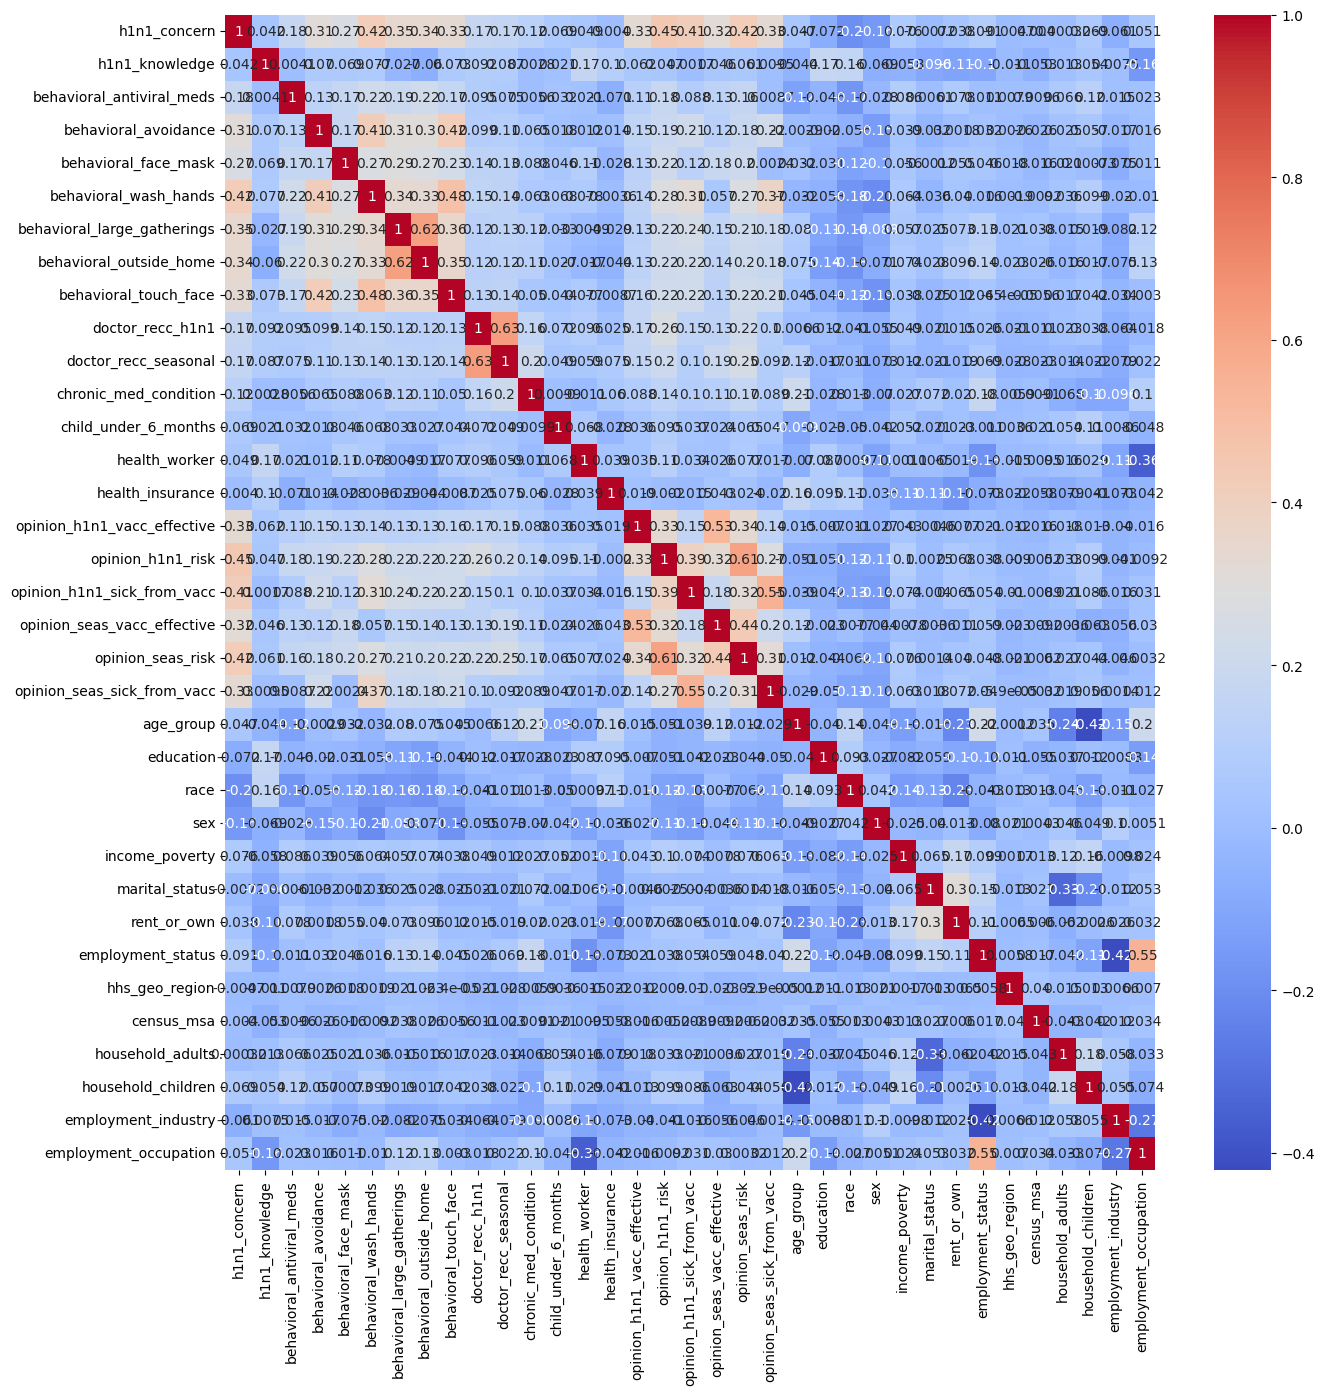

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# create correlation matrix
corr = df_TrainingFeatures.corr()
# Membuat heatmap
fig, ax = plt.subplots(figsize=(15, 15)) # menambahkan figsize
sns.heatmap(corr, cmap='coolwarm', annot=True, ax=ax)



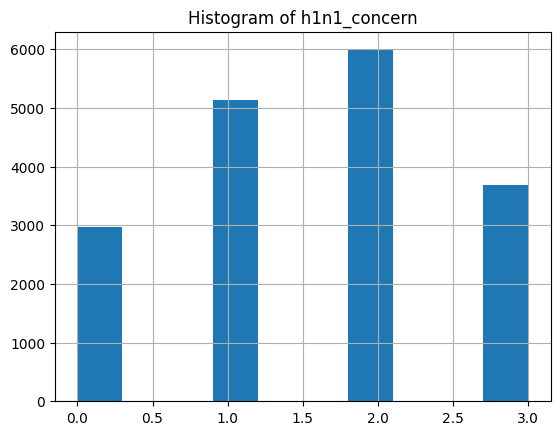

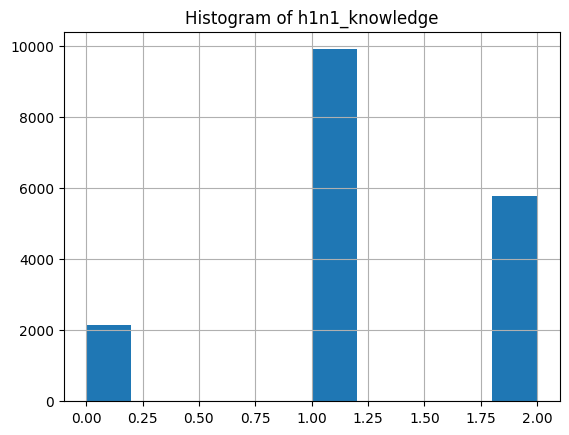

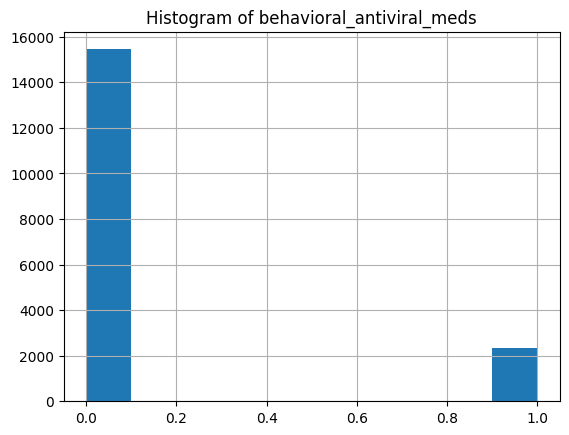

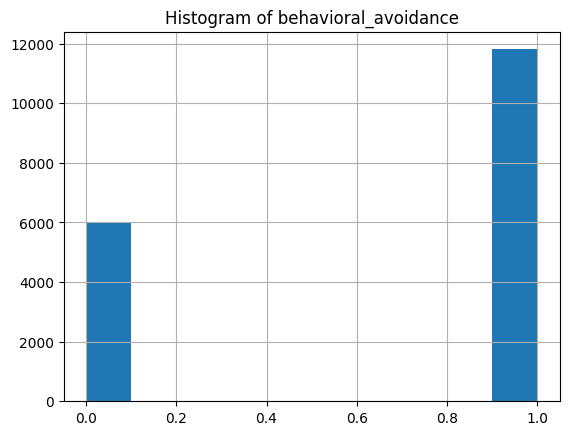

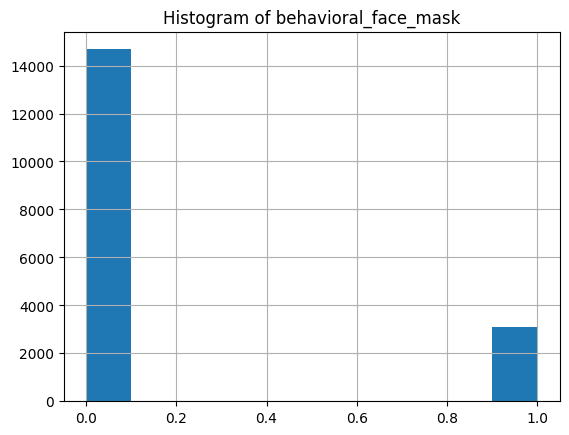

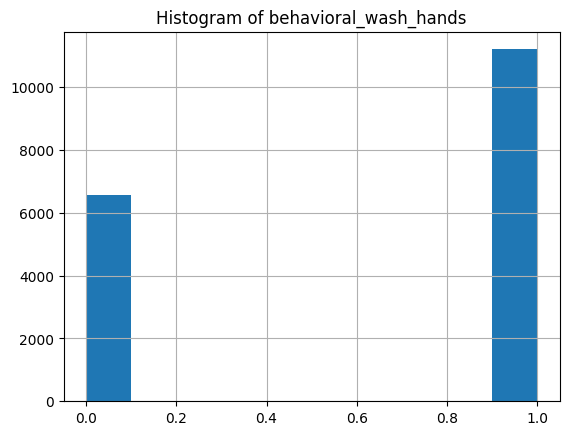

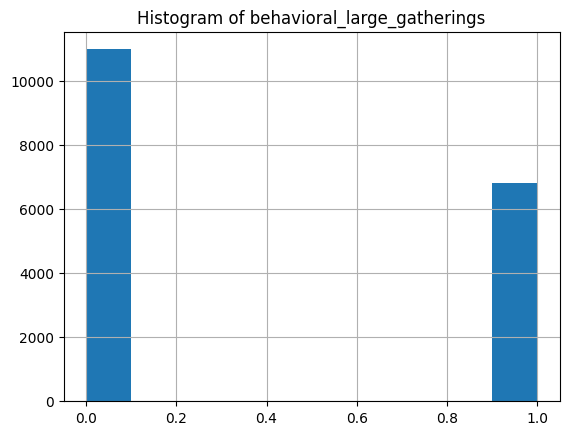

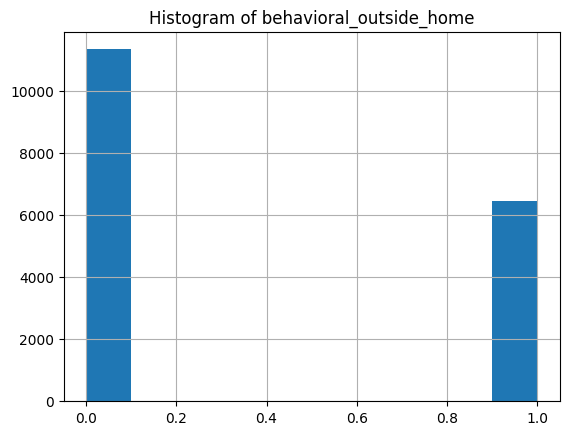

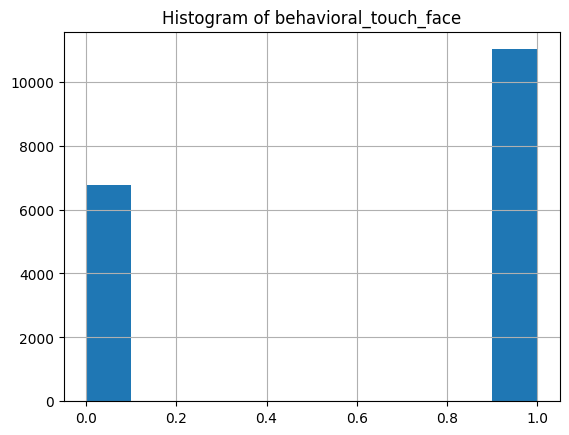

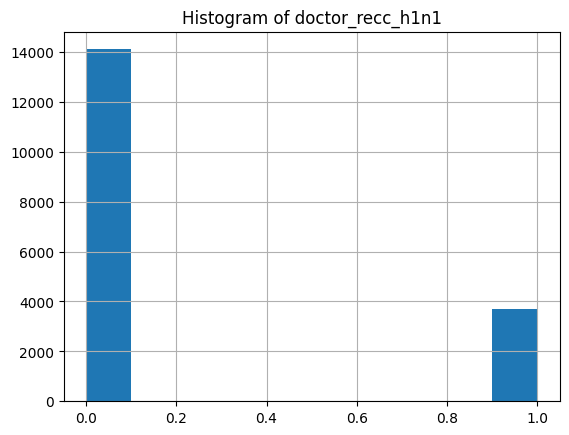

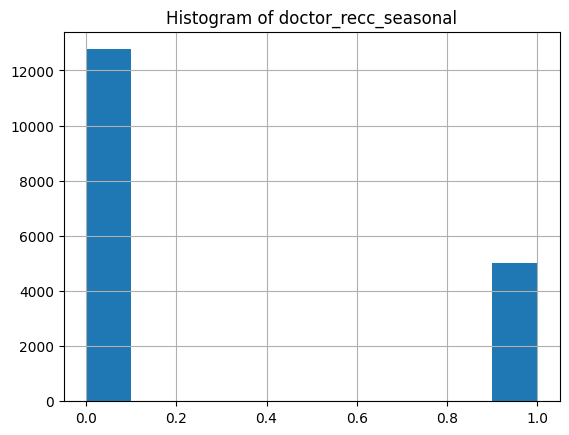

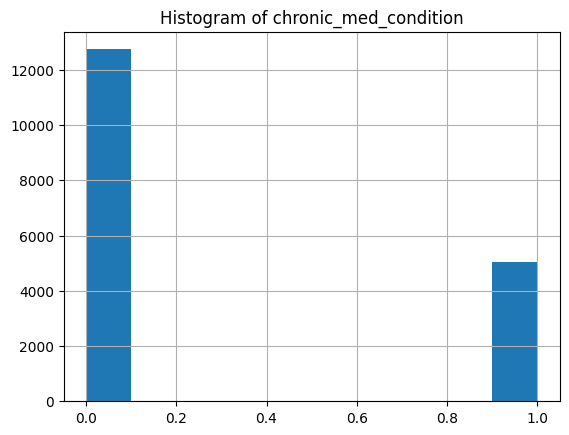

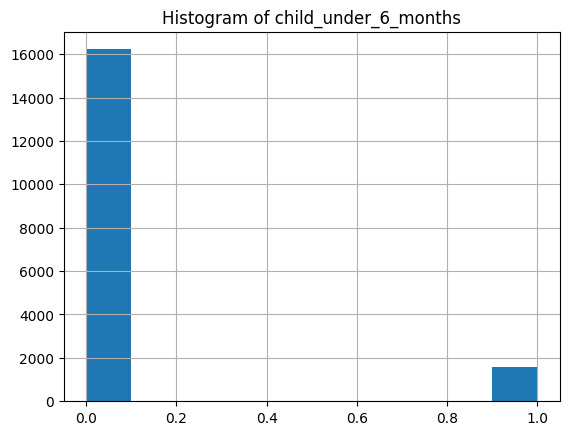

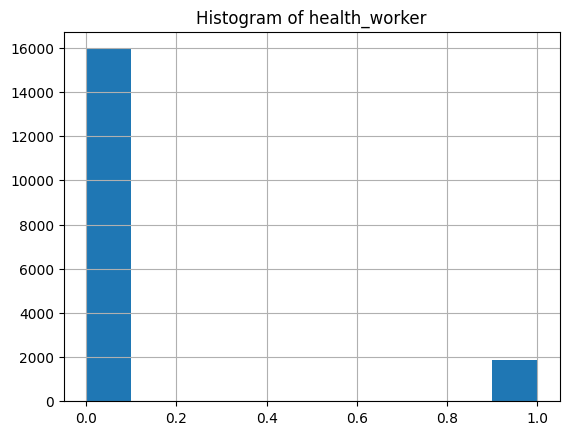

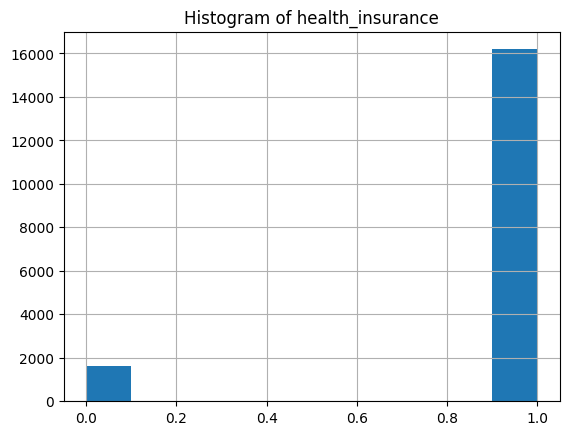

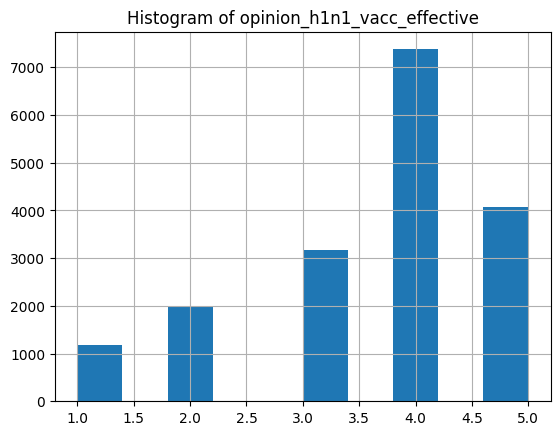

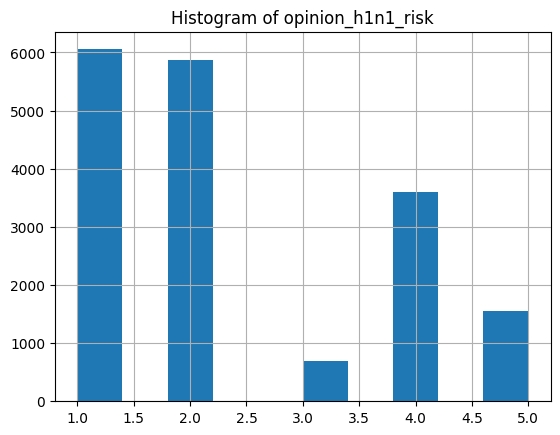

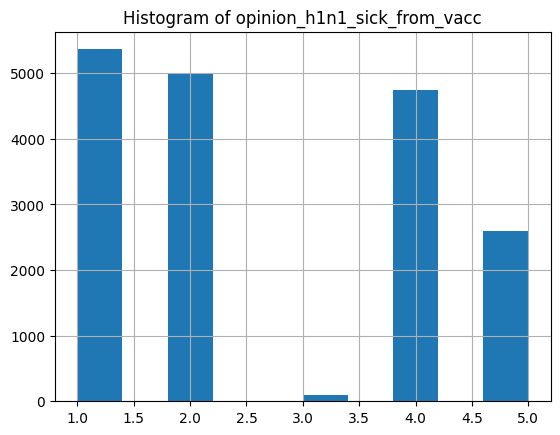

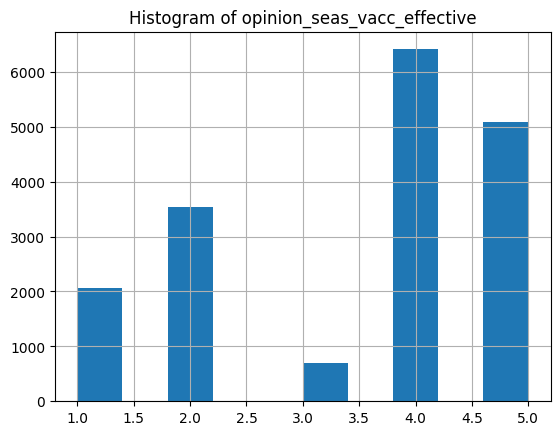

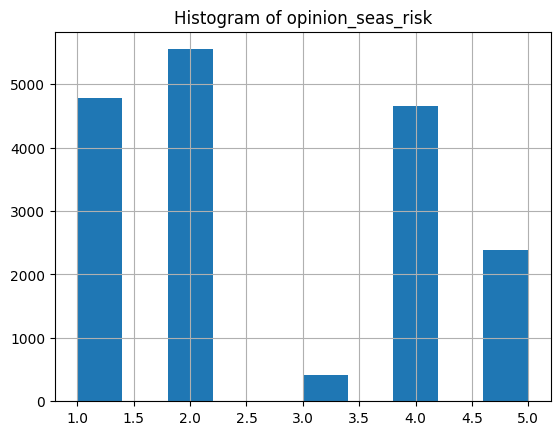

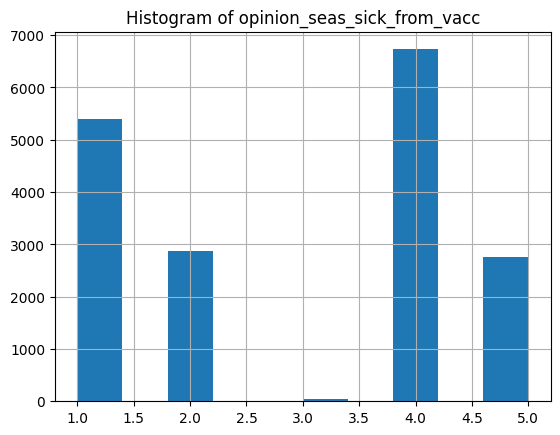

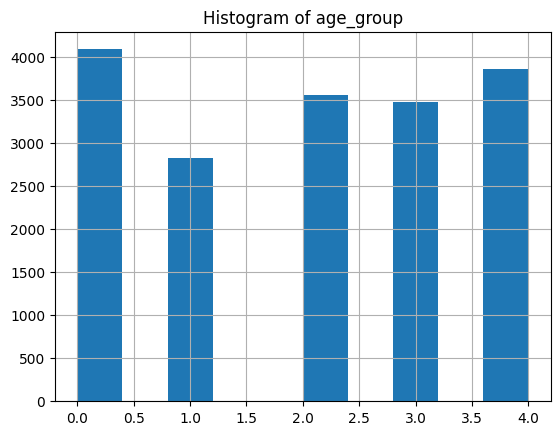

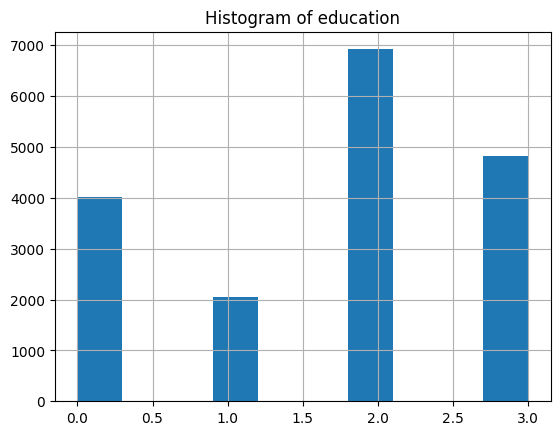

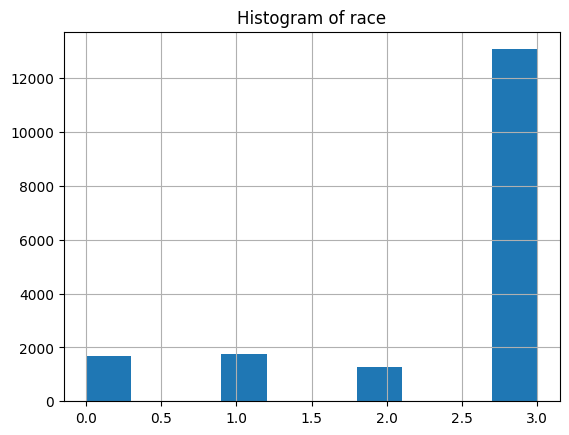

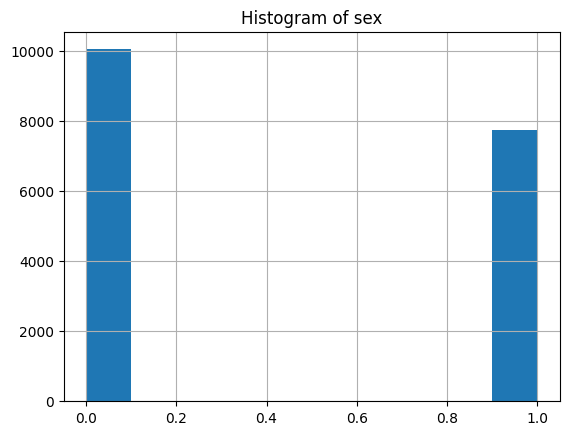

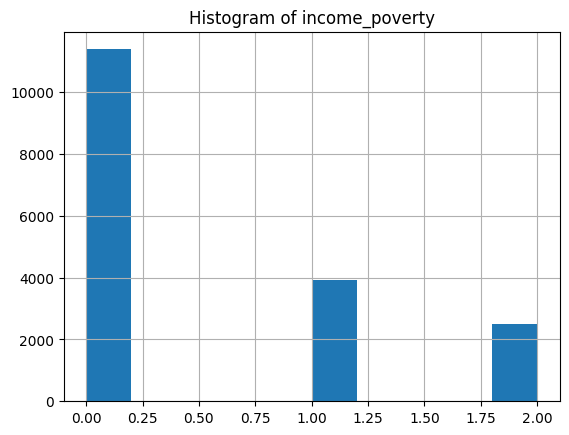

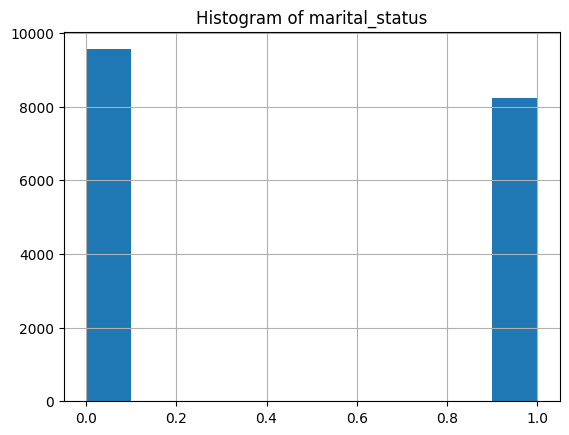

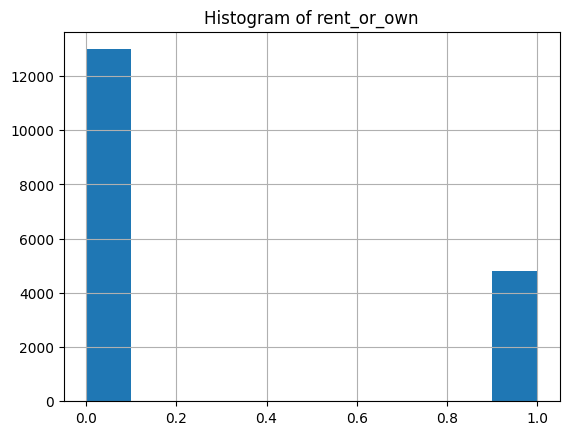

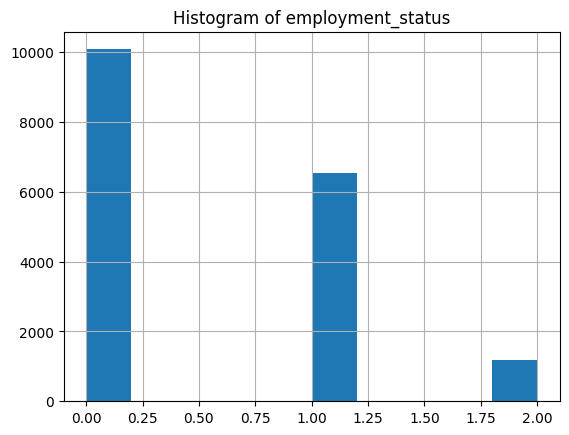

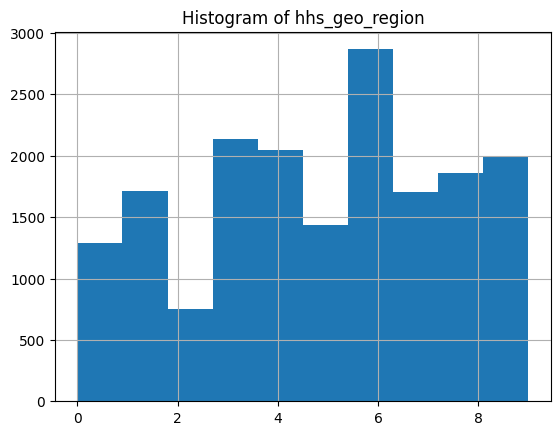

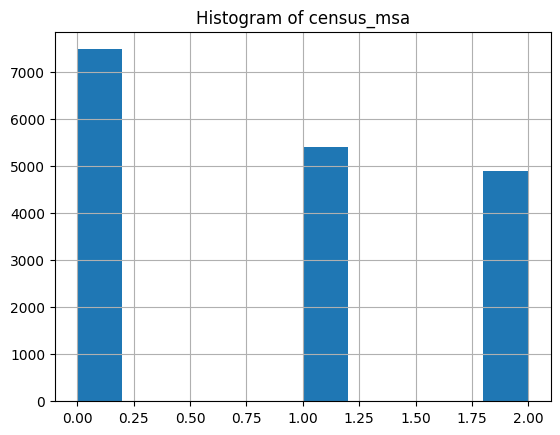

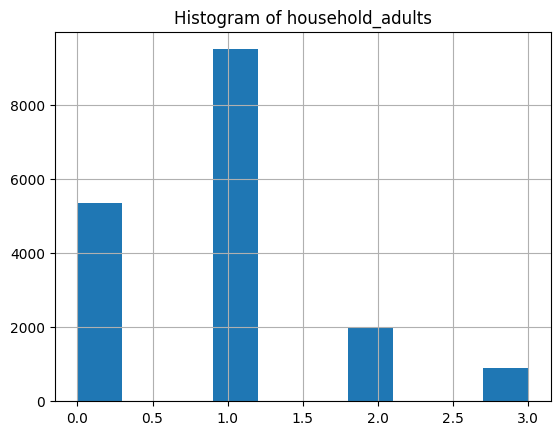

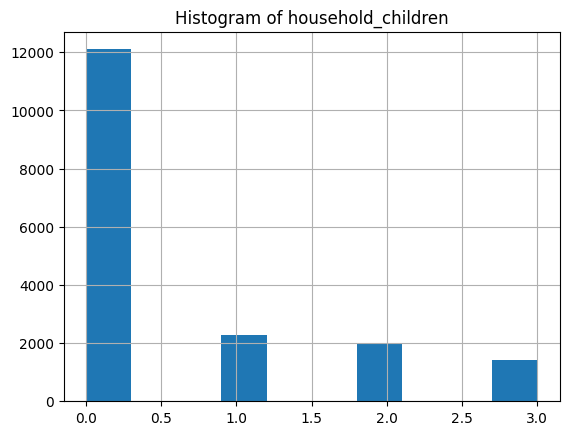

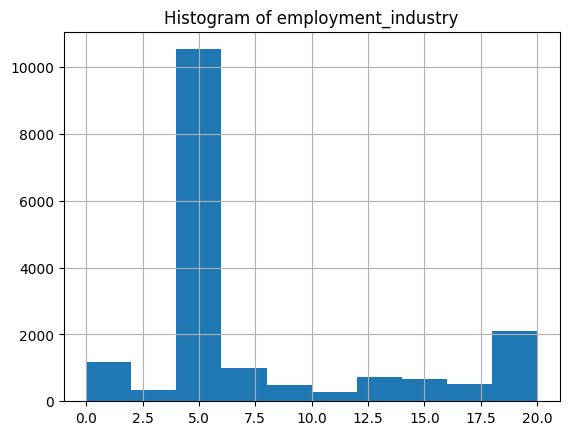

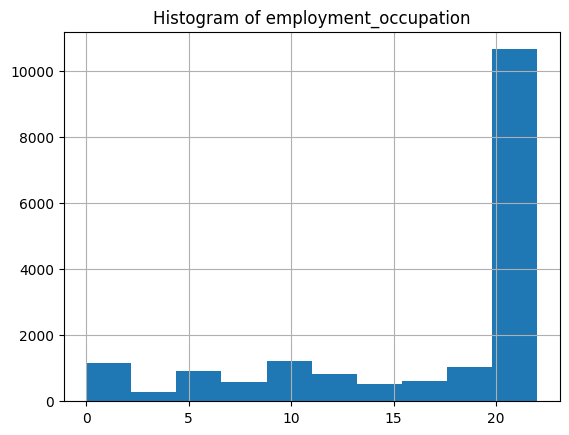

In [17]:

def visualize_data(df):
    """
    Fungsi untuk menampilkan visualisasi banyaknya variabel pada setiap kolom dataframe.
    """
    # Cek tipe data setiap kolom
    column_types = df.dtypes

    # Looping untuk setiap kolom
    for column in df.columns:
        # Hanya tampilkan visualisasi jika tipe datanya numerik
        if column_types[column] in ['int64', 'float64']:
            # Buat histogram
            df[column].hist(bins=10)
            plt.title(f'Histogram of {column}')
            plt.show()
visualize_data(df_TrainingFeatures)

In [ ]:
print(df_TrainingFeatures.isnull().sum())

In [21]:
TrainingLabels_path = '/content/drive/My Drive/FindIT/training_set_labels.csv'
df_TrainingLabels = pd.read_csv(TrainingLabels_path)
df_TrainingLabels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


##feature selection


In [22]:
import numpy as np
import random
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def objective_function(X, y, feature_subset):
    model = LogisticRegression()
    scores = cross_val_score(model, X[:, feature_subset], y, cv=5)
    return np.mean(scores)

def binary_bat_algorithm(X, y, n_bats=10, n_iterations=100, a=0.9, r0=0.5):
    n_features = X.shape[1]
    bats = np.random.randint(0, 2, (n_bats, n_features))
    velocities = np.random.uniform(-1, 1, (n_bats, n_features))
    frequencies = np.random.uniform(0, 2, n_bats)
    best_bat = bats[np.argmax([objective_function(X, y, bat) for bat in bats])]

    for _ in range(n_iterations):
        for i, bat in enumerate(bats):
            velocities[i] += (bat - best_bat) * frequencies[i]
            new_bat = (bat + velocities[i]).clip(0, 1)
            new_bat = (np.random.rand(n_features) < new_bat).astype(int)

            if objective_function(X, y, new_bat) > objective_function(X, y, bat):
                bats[i] = new_bat

            if np.random.rand() > r0:
                new_bat = best_bat + np.random.uniform(-a, a, n_features)
                new_bat = (np.random.rand(n_features) < new_bat).astype(int)

                if objective_function(X, y, new_bat) > objective_function(X, y, bat):
                    bats[i] = new_bat

        best_bat = bats[np.argmax([objective_function(X, y, bat) for bat in bats])]

    return best_bat



In [23]:
df_TrainingLabels['h1n1_vaccine']

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

In [24]:
X, y = df_TrainingFeatures.values, df_TrainingLabels['h1n1_vaccine'].values
selected_features = binary_bat_algorithm(X, y)
print("Selected features:", selected_features)

ValueError: ignored

In [ ]:
unique_classes = df_TrainingLabels['h1n1_vaccine'].unique()
num_classes = len(unique_classes)
print(num_classes)